In [1]:
import pandas as pd
import numpy as np
import json
import glob
import matplotlib.pyplot as plt
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [8]:
def payloads_from_json_log_single(filename):
    with open(filename, 'r') as f:
        for line in f:
            obj = json.loads(line)
            yield {
                "device_id": obj["end_device_ids"]["device_id"],
                "received_at": obj["received_at"],
                "gateway_id": [m["gateway_ids"]["gateway_id"] for m in obj["uplink_message"]["rx_metadata"]],
                **obj["uplink_message"].get("decoded_payload", {})
            } 
            

def payloads_from_json_log(fname_pattern):
    for fname in glob.glob(fname_pattern):
        yield from payloads_from_json_log_single(fname)

In [9]:
df = pd.DataFrame(payloads_from_json_log("/storage/stations/GEODOS/*.json"))
df["received_at"] = pd.to_datetime(df["received_at"])

In [4]:
df

,device_id,received_at,gateway_id,V,hits,mA,°C
0,geodosbf,2021-09-02 03:50:59.664981042+00:00,[crreat2],4.19,65524.0,-244.0,20.0
1,geodosbf,2021-09-02 03:52:40.559048539+00:00,[crreat2],4.19,65524.0,220.0,20.0
2,geodosbf,2021-09-02 03:54:23.702237570+00:00,[crreat2],4.19,65524.0,200.0,20.0
3,geodosbf,2021-09-02 03:56:08.439216491+00:00,[crreat2],4.19,65524.0,180.0,20.0
4,geodosbf,2021-09-02 03:57:52.890110666+00:00,[crreat2],4.19,65524.0,162.0,20.0
...,...,...,...,...,...,...,...
851,geodosbf,2021-09-06 10:59:29.625407917+00:00,[crreat2],4.11,65524.0,-60.0,23.0
852,geodosbf,2021-09-06 11:04:46.208196131+00:00,[crreat2],4.19,65524.0,184.0,23.0
853,geodosbf,2021-09-06 11:08:15.469062199+00:00,[crreat2],4.19,65524.0,151.0,23.0
854,geodosbf,2021-09-07 06:20:51.491519987+00:00,[crreat2],4.19,65524.0,205.0,21.0


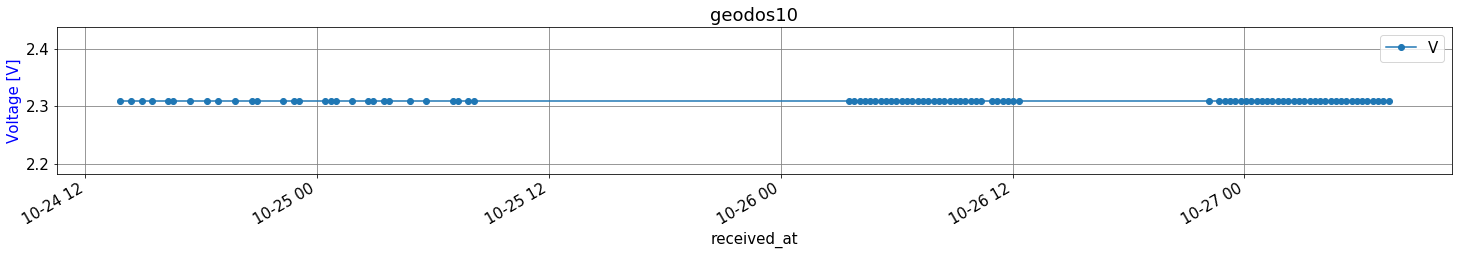

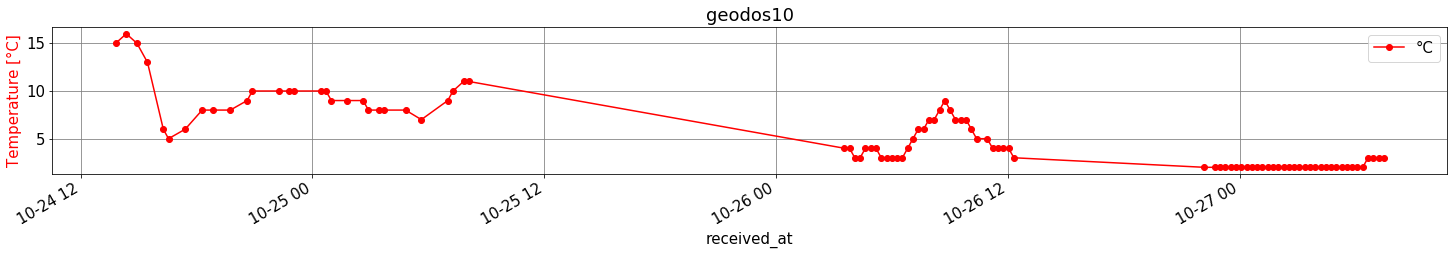

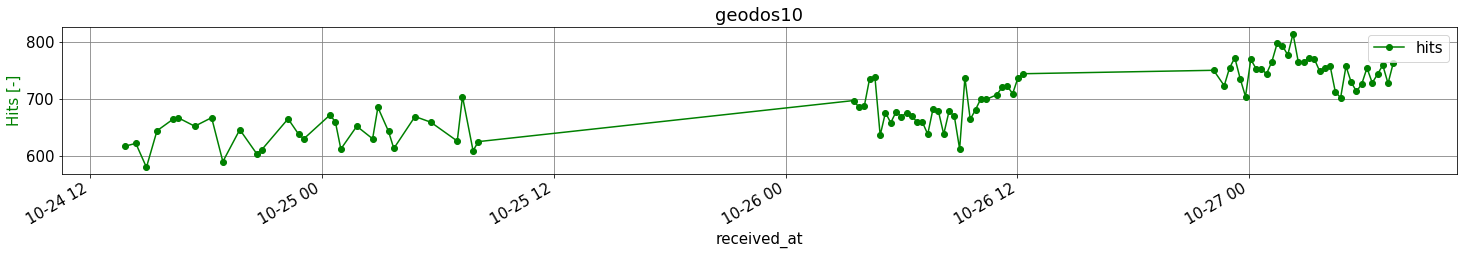

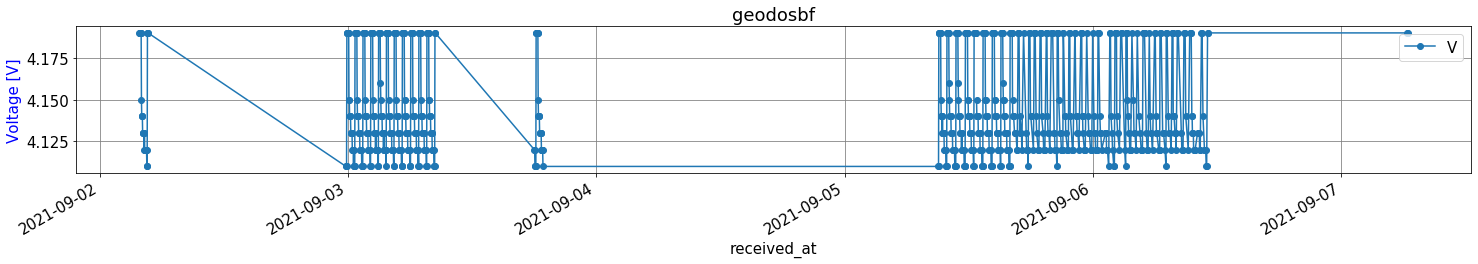

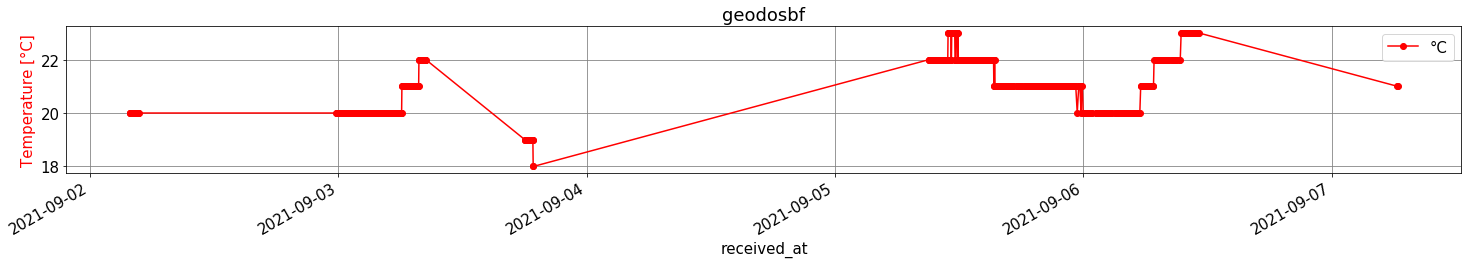

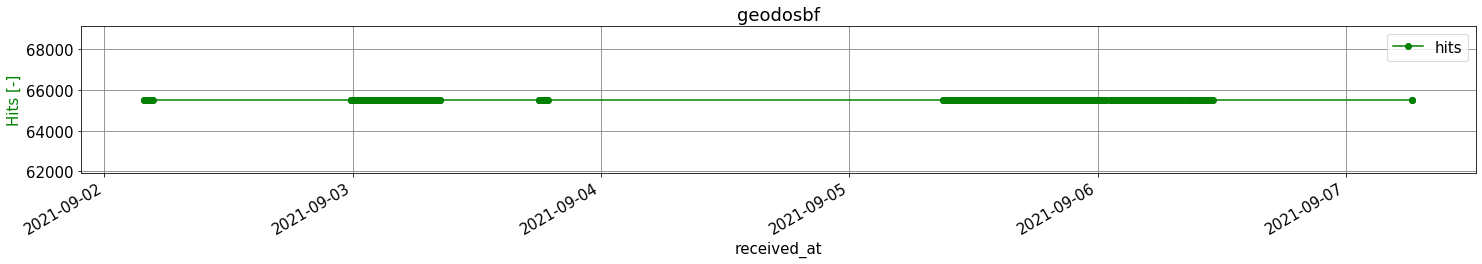

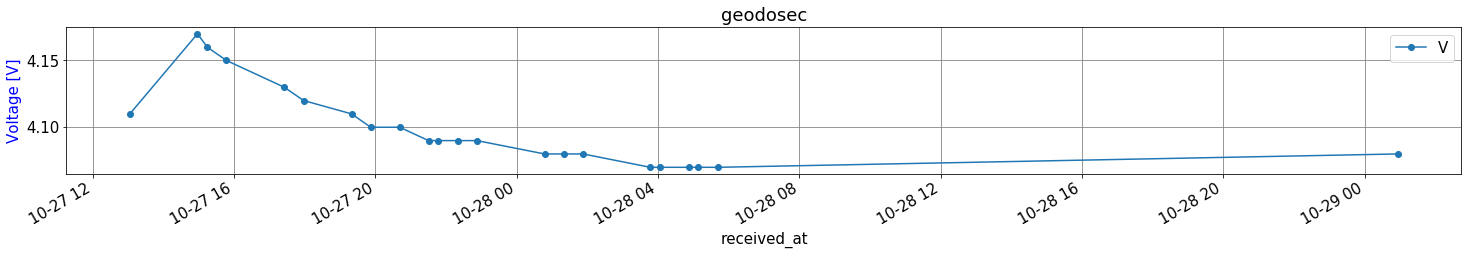

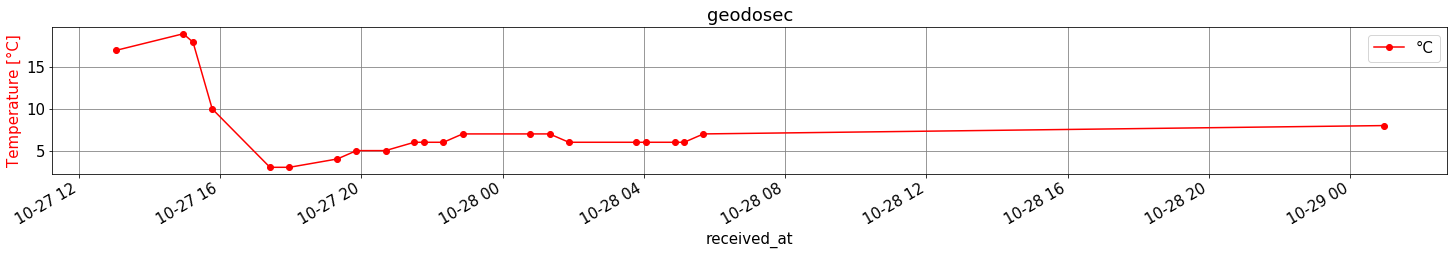

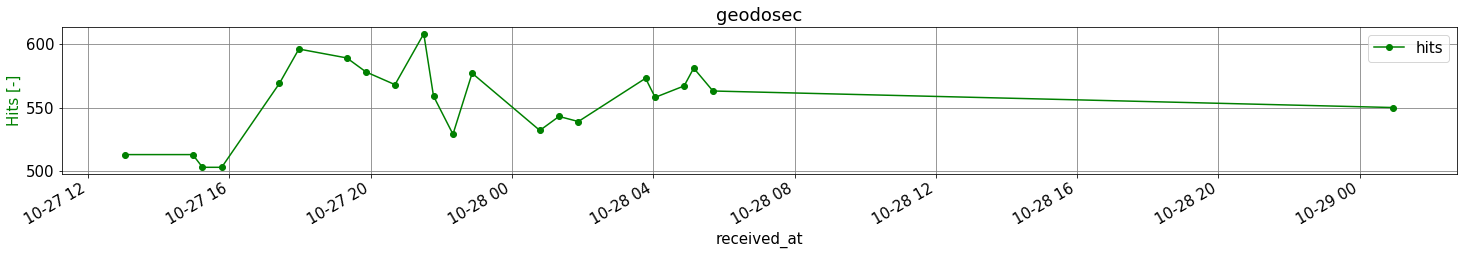

In [19]:
#plt.figure(figsize=(10,1))
#plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

# iterate over unique device IDs seen in logged messages
for dev_id in np.unique(df["device_id"]):
    # select rows from that particular device
    df_filtered = df[df["device_id"] == dev_id]
    
    # some plots...
    df_filtered.plot("received_at", "V", figsize=(25, 3), title=dev_id, marker='o')
    plt.ylabel('Voltage [V]', color='blue')
    plt.grid(b=True, which='major', color='grey', linestyle='-')
    df_filtered.plot("received_at", "°C", figsize=(25, 3), title=dev_id, color='red', marker='o')
    plt.ylabel('Temperature [°C]', color='red')
    plt.grid(b=True, which='major', color='grey', linestyle='-')
    df_filtered.plot("received_at", "hits", figsize=(25, 3), title=dev_id, color='green', marker='o')
    plt.ylabel('Hits [-]', color='green')
    plt.grid(b=True, which='major', color='grey', linestyle='-')

